# Chapter 7 - Exercises

## 1.

In [26]:
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('chapter_07.csv')
df.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


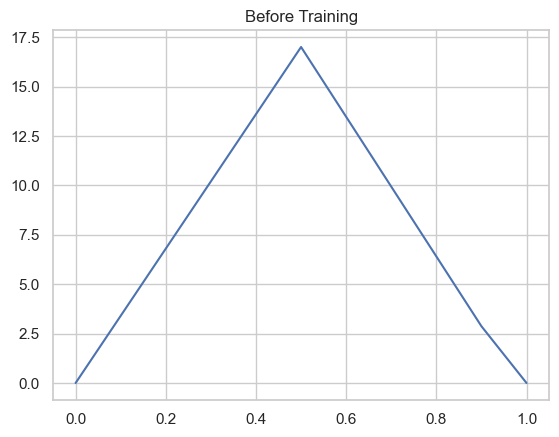

Final bias: -16.001882553100586 (loss: 0.0000658967)


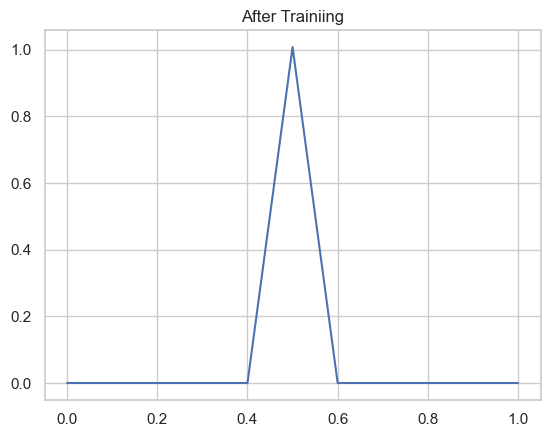

In [44]:
class BasicNN_train(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

    def forward(self, input):

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        return F.relu(input_to_final_relu)

def draw_model(model, title):
    input_values = torch.linspace(start=0, end=1, steps=11)
    output_values = model(input_values)

    sns.set(style="whitegrid")
    sns.lineplot(x=input_values, y=output_values.detach())
    plt.title(title)
    plt.show()


model = BasicNN_train()

draw_model(model, "Before Training")

inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1.,  0.])

optimizer = SGD(model.parameters(), lr=0.1)

for epoch in range(100):
    
    total_loss = 0

    for i in range(len(inputs)):

        input_i = inputs[i]
        label_i = labels[i]
        output_i = model(input_i)
        loss = (output_i - label_i)**2
        loss.backward()
        total_loss += float(loss)

    if(total_loss < 0.0001):
        break

    optimizer.step()
    optimizer.zero_grad()

print(f"Final bias: {model.final_bias.data} (loss: {total_loss:.10f})")

draw_model(model, "After Trainiing")
